<a href="https://colab.research.google.com/github/MulamHema/ml_intern/blob/main/task9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Load the dataset
data = pd.read_csv('/content/Real estate.csv')

In [ ]:
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [ ]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [ ]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:

X = data[['X2 house age']]
y = data['Y house price of unit area']

In [ ]:

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Text(0.5, 0, 'Price Per Unit Area')

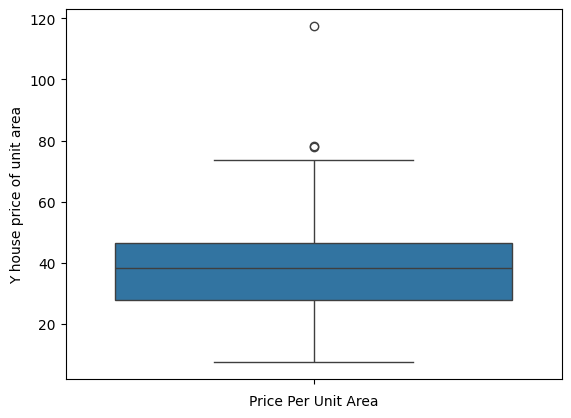

In [ ]:
sns.boxplot(data=data,y='Y house price of unit area')
plt.xlabel("Price Per Unit Area")

In [ ]:

# Create and fit the model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2:", train_r2)
print("Test R^2:", test_r2)

Train RMSE: 13.39617518612112
Test RMSE: 12.853214192676935
Train R^2: 0.04589807953973646
Test R^2: 0.015227904910820378


In [ ]:
degree = 2  # Degree of polynomial
poly_features = PolynomialFeatures(degree=degree)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)


In [ ]:
# Fit polynomial regression model
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred_train_poly = poly_model.predict(x_train_poly)
y_pred_test_poly = poly_model.predict(x_test_poly)

# Evaluate the model
train_rmse_poly = np.sqrt(mean_squared_error(y_train, y_pred_train_poly))
test_rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_test_poly))
train_r2_poly = r2_score(y_train, y_pred_train_poly)
test_r2_poly = r2_score(y_test, y_pred_test_poly)

print("Train RMSE (Polynomial):", train_rmse_poly)
print("Test RMSE (Polynomial):", test_rmse_poly)
print("Train R^2 (Polynomial):", train_r2_poly)
print("Test R^2 (Polynomial):", test_r2_poly)

Train RMSE (Polynomial): 12.318051374336008
Test RMSE (Polynomial): 11.446451236014383
Train R^2 (Polynomial): 0.19329052941842562
Test R^2 (Polynomial): 0.21899472204644388


In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.015227904910820378


In [ ]:
print(lr.coef_)
print(lr.intercept_)

[-0.25978378]
42.88289629775735


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


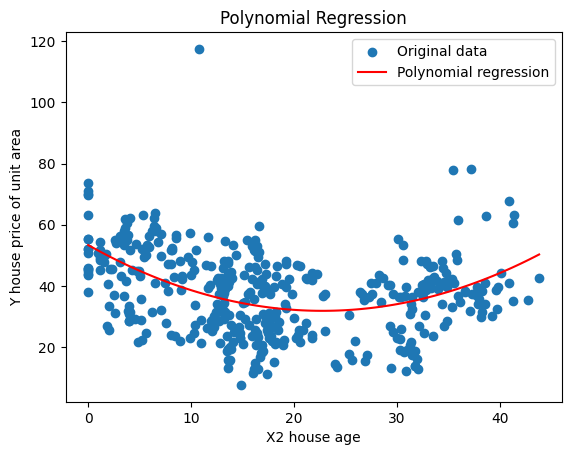

In [ ]:
# Visualize the polynomial regression
X_new = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)
y_new = poly_model.predict(X_new_poly)

plt.scatter(X, y, label='Original data')
plt.plot(X_new, y_new, color='red', label='Polynomial regression')
plt.xlabel('X2 house age')
plt.ylabel('Y house price of unit area')
plt.title('Polynomial Regression')
plt.legend()
plt.show()